## Ensemble of the CNN output

Using the output of each of our CNN models, use an ensemble learning method to form a final prediction. Hold back the an unseen set of data to test the performance of the ensemble model.

### Create the input features for our ensemble

### Load data

Firstly load, and validate the output of each CNN to form input for our ensemble.

In [647]:
import os
import numpy as np
from glob import glob
import json

In [648]:
train_targets = np.load(open('./images/train_targets.npy','rb'))
valid_targets = np.load(open('./images/valid_targets.npy','rb'))
test_targets = np.load(open('./images/test_targets.npy','rb'))

In [649]:
xception_final_train = np.load(open('./cnn_output/xception_train.npy', 'rb'))
xception_final_validation = np.load(open('./cnn_output/xception_validation.npy', 'rb'))
xception_final_test = np.load(open('./cnn_output/xception_test.npy', 'rb'))

In [650]:
inception_final_train = np.load(open('./cnn_output/inception_train.npy', 'rb'))
inception_final_validation = np.load(open('./cnn_output/inception_validation.npy', 'rb'))
inception_final_test = np.load(open('./cnn_output/inception_test.npy', 'rb'))

In [651]:
resnet_final_train = np.load(open('./cnn_output/resnet_train.npy', 'rb'))
resnet_final_validation = np.load(open('./cnn_output/resnet_validation.npy', 'rb'))
resnet_final_test = np.load(open('./cnn_output/resnet_test.npy', 'rb'))

Also load the intermediate stages of the inception and xception models to potentially use as additional input features

In [652]:
inception_intermediate_train = np.load(open('./cnn_output/inception_pre_train.npy', 'rb'))
inception_intermediate_validation = np.load(open('./cnn_output/inception_pre_validation.npy', 'rb'))
inception_intermediate_test = np.load(open('./cnn_output/inception_pre_test.npy', 'rb'))

In [653]:
xception_intermediate_train = np.load(open('./cnn_output/xception_pre_train.npy', 'rb'))
xception_intermediate_validation = np.load(open('./cnn_output/xception_pre_validation.npy', 'rb'))
xception_intermediate_test = np.load(open('./cnn_output/xception_pre_test.npy', 'rb'))

Ensure all the input looks ok before we use it

In [654]:
(len(xception_final_test) == 
 len(xception_intermediate_test) == 
 len(inception_final_test) ==
 len(inception_intermediate_test) ==
 len(resnet_final_test) == 
 len(test_targets))


True

In [655]:
(len(xception_final_train) == 
 len(xception_intermediate_train) == 
 len(inception_final_train) ==
 len(inception_intermediate_train) ==
 len(resnet_final_train) == 
 len(train_targets))

True

In [656]:
(len(xception_final_validation) == 
 len(xception_intermediate_validation) == 
 len(inception_final_validation) ==
 len(inception_intermediate_validation) ==
 len(resnet_final_validation) == 
 len(valid_targets))

True

In [657]:
print(xception_final_test[0])
print(xception_intermediate_test[0])
print(resnet_final_test[0])
print(inception_final_test[0])
print(inception_intermediate_test[0])

[ 0.9649052   0.03509481]
[ 0.  1.]
[ 0.91125214  0.08874789]
[  1.00000000e+00   1.37481881e-21]
[ 1.  0.]


In [658]:
print(xception_final_test[0])
print(xception_intermediate_test[0])
print(resnet_final_test[0])
print(inception_final_test[0])
print(inception_intermediate_test[0])
print(test_targets[0])

[ 0.9649052   0.03509481]
[ 0.  1.]
[ 0.91125214  0.08874789]
[  1.00000000e+00   1.37481881e-21]
[ 1.  0.]
[ 1.  0.]


In [659]:
print(xception_final_train[1])
print(xception_intermediate_train[1])
print(resnet_final_train[1])
print(inception_final_train[1])
print(inception_intermediate_train[1])
print(train_targets[1])

[ 0.34110832  0.65889168]
[ 0.  1.]
[ 0.93360239  0.06639765]
[ 0.  1.]
[ 1.  0.]
[ 0.  1.]


In [660]:
print(xception_final_train[100])
print(xception_intermediate_train[100])
print(resnet_final_train[100])
print(inception_final_train[100])
print(inception_intermediate_train[100])
print(train_targets[100])

[ 0.23389982  0.76610011]
[ 1.  0.]
[ 0.55512452  0.44487545]
[ 0.  1.]
[ 1.  0.]
[ 0.  1.]


In [661]:
print(xception_final_validation[101])
print(xception_intermediate_validation[101])
print(resnet_final_validation[101])
print(inception_final_validation[101])
print(inception_intermediate_validation[101])
print(valid_targets[101])

[ 0.32793856  0.67206144]
[ 1.  0.]
[ 0.82669687  0.17330314]
[ 1.  0.]
[ 1.  0.]
[ 1.  0.]


### Transform the data

Append the validation data set to the training dataset, we will use cross validation when training our ensemble so this will give us more training data.

In [662]:
xception_appended_final_train = np.append(xception_final_train, xception_final_validation, axis=0)
xception_appended_intermediate_train = np.append(xception_intermediate_train, xception_intermediate_validation, axis=0)
inception_appended_final_train = np.append(inception_final_train, inception_final_validation, axis=0)
inception_appended_intermediate_train = np.append(inception_intermediate_train, inception_intermediate_validation, axis=0)
resnet_appended_final_train = np.append(resnet_final_train, resnet_final_validation, axis=0)

In [663]:
print(np.shape(xception_appended_final_train))
print(np.shape(xception_appended_intermediate_train))
print(np.shape(inception_appended_final_train))
print(np.shape(inception_appended_intermediate_train))
print(np.shape(resnet_appended_final_train))

(2150, 2)
(2150, 2)
(2150, 2)
(2150, 2)
(2150, 2)


Get the malignant feature predictor(in element position 1 in each input row)  from each input array and create are new input vector.

In [664]:
a = xception_appended_final_train[:,1]
b = resnet_appended_final_train[:,1]
c = inception_appended_final_train[:,1]
d = xception_appended_intermediate_train[:,1]
e = inception_appended_intermediate_train[:,1]


In [665]:
train_data = np.vstack((a,b,c,d,e))
train_data = train_data.T
train_data_with_int = train_data
train_data = train_data[:,0:3]

In [666]:
print(np.shape(train_data_with_int))
print(train_data_with_int[100])
print(np.shape(train_data))
print(train_data[100])

(2150, 5)
[ 0.76610011  0.44487545  1.          0.          0.        ]
(2150, 3)
[ 0.76610011  0.44487545  1.        ]


In [667]:
a = xception_final_test[:,1]
b = resnet_final_test[:,1]
c = inception_final_test[:,1]
d = xception_intermediate_test[:,1]
e = inception_intermediate_test[:,1]

In [668]:
test_data_with_int = np.vstack((a,b,c,d,e)).T

In [669]:
test_data = test_data_with_int[:,0:3]

In [670]:
print(np.shape(test_data_with_int))
print(np.shape(test_data))
print(test_data_with_int[0])
print(test_data[0])

(600, 5)
(600, 3)
[  3.50948051e-02   8.87478888e-02   1.37481881e-21   1.00000000e+00
   0.00000000e+00]
[  3.50948051e-02   8.87478888e-02   1.37481881e-21]


In [672]:
train_targets_int = train_targets[:,1]
valid_targets_int = valid_targets[:,1]
test_targets_final = test_targets[:,1]
print(np.shape(valid_targets_int))
print(np.shape(train_targets_int))

(150,)
(2000,)


In [673]:
train_targets_final = np.append(train_targets_int, valid_targets_int)
print(np.shape(train_targets_final))

(2150,)


In [674]:
print(np.shape(test_targets_final))

(600,)


output to file our test and training data

In [675]:
np.save(open('./ensemble_input/test.npy', 'wb'), test_data)
np.save(open('./ensemble_input/test_with_int.npy', 'wb'), test_data_with_int)
np.save(open('./ensemble_input/train.npy', 'wb'), train_data)
np.save(open('./ensemble_input/train_with_int.npy', 'wb'), train_data_with_int)

### Random Forest

In [623]:
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
ensemble = RandomForestClassifier(n_estimators=500, random_state=5)
ensemble.fit(train_data, train_targets_final)
#scores = cross_val_score(ensemble, train_data, train_targets_final, cv=5, scoring='f1_macro')
preds = ensemble.predict(test_data)


In [624]:
print(metrics.f1_score(test_targets_final, preds))
print(metrics.confusion_matrix(test_targets_final, preds))
print(metrics.accuracy_score(test_targets_final,preds))
print(metrics.average_precision_score(test_targets_final, preds))
print(metrics.recall_score(test_targets_final, preds))
print(metrics.)

0.43119266055
[[429  52]
 [ 72  47]]
0.793333333333
0.49485272897
0.394957983193


### RandomForrest with all data including intermediates

In [627]:
ensemble = RandomForestClassifier(n_estimators=400, random_state=5)
ensemble.fit(train_data_with_int, train_targets_final)
#scores = cross_val_score(ensemble, train_data, train_targets_final, cv=5, scoring='f1_macro')
preds = ensemble.predict(test_data_with_int)


In [628]:
print(metrics.f1_score(test_targets_final, preds))
print(metrics.confusion_matrix(test_targets_final, preds))
print(metrics.accuracy_score(test_targets_final,preds))
print(metrics.average_precision_score(test_targets_final, preds))
print(metrics.recall_score(test_targets_final, preds))

0.444444444444
[[432  49]
 [ 71  48]]
0.8
0.508270019348
0.403361344538


## AdaBoost

In [633]:
from sklearn.ensemble import AdaBoostClassifier
ensemble = AdaBoostClassifier(n_estimators=340, learning_rate=1.0, random_state=5)
#ensemble.fit(train_data, train_targets_final)
#preds = ensemble.predict(test_data)

y_score = ensemble.fit(train_data, train_targets_final).decision_function(test_data)
preds = ensemble.predict(test_data)

In [634]:
print(metrics.f1_score(test_targets_final, preds))
print(metrics.confusion_matrix(test_targets_final, preds))
print(metrics.accuracy_score(test_targets_final,preds))
print(metrics.average_precision_score(test_targets_final, preds))
print(metrics.recall_score(test_targets_final, preds))

0.5
[[444  37]
 [ 67  52]]
0.826666666667
0.566455559752
0.436974789916


In [493]:
from sklearn.metrics import roc_curve, auc
# Compute ROC curve and ROC area for each class
fpr_ada = dict()
tpr_ada = dict()
roc_auc_ada = dict()

fpr_ada, tpr_ada, _ = roc_curve(test_targets_final, y_score)
roc_auc_ada = auc(fpr_ada, tpr_ada)

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(test_targets_final.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

### AdaBoost of all models including intermediates

In [631]:
ensemble = AdaBoostClassifier(n_estimators=620, learning_rate=1.0, random_state=5)
#ensemble.fit(train_data, train_targets_final)
#preds = ensemble.predict(test_data)

y_score = ensemble.fit(train_data_with_int, train_targets_final).decision_function(test_data_with_int)
preds = ensemble.predict(test_data_with_int)

In [632]:
print(metrics.f1_score(test_targets_final, preds))
print(metrics.confusion_matrix(test_targets_final, preds))
print(metrics.accuracy_score(test_targets_final,preds))
print(metrics.average_precision_score(test_targets_final, preds))
print(metrics.recall_score(test_targets_final, preds))

0.441176470588
[[441  40]
 [ 74  45]]
0.81
0.515448179272
0.378151260504


### Bagging

In [635]:
from sklearn.ensemble import BaggingClassifier
ensemble = BaggingClassifier(n_estimators=600, random_state=5)
ensemble.fit(train_data, train_targets_final)
preds = ensemble.predict(test_data)


In [636]:
print(metrics.f1_score(test_targets_final, preds))
print(metrics.confusion_matrix(test_targets_final, preds))
print(metrics.accuracy_score(test_targets_final,preds))
print(metrics.average_precision_score(test_targets_final, preds))
print(metrics.recall_score(test_targets_final, preds))

0.431924882629
[[433  48]
 [ 73  46]]
0.798333333333
0.498791495322
0.386554621849


### Bagging including all intermediates

In [637]:
ensemble = BaggingClassifier(n_estimators=2000, random_state=5)
ensemble.fit(train_data_with_int, train_targets_final)
preds = ensemble.predict(test_data_with_int)


In [638]:
print(metrics.f1_score(test_targets_final, preds))
print(metrics.confusion_matrix(test_targets_final, preds))
print(metrics.accuracy_score(test_targets_final,preds))
print(metrics.average_precision_score(test_targets_final, preds))
print(metrics.recall_score(test_targets_final, preds))

0.427184466019
[[438  43]
 [ 75  44]]
0.803333333333
0.500247512798
0.36974789916


### SVC

In [211]:
from __future__ import print_function

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC

print(__doc__)

# Split the dataset in two equal parts
X_train, X_test, y_train, y_test = train_test_split(
    train_data, train_targets_final, test_size=0.9, random_state=5)

# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(SVC(), tuned_parameters, cv=5,
                       scoring='%s_macro' % score)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()



Automatically created module for IPython interactive environment
# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'gamma': 0.001, 'C': 100, 'kernel': 'rbf'}

Grid scores on development set:

0.412 (+/-0.008) for {'gamma': 0.001, 'C': 1, 'kernel': 'rbf'}
0.412 (+/-0.008) for {'gamma': 0.0001, 'C': 1, 'kernel': 'rbf'}
0.412 (+/-0.008) for {'gamma': 0.001, 'C': 10, 'kernel': 'rbf'}
0.412 (+/-0.008) for {'gamma': 0.0001, 'C': 10, 'kernel': 'rbf'}
0.992 (+/-0.013) for {'gamma': 0.001, 'C': 100, 'kernel': 'rbf'}
0.412 (+/-0.008) for {'gamma': 0.0001, 'C': 100, 'kernel': 'rbf'}
0.992 (+/-0.013) for {'gamma': 0.001, 'C': 1000, 'kernel': 'rbf'}
0.992 (+/-0.013) for {'gamma': 0.0001, 'C': 1000, 'kernel': 'rbf'}
0.992 (+/-0.013) for {'kernel': 'linear', 'C': 1}
0.992 (+/-0.013) for {'kernel': 'linear', 'C': 10}
0.992 (+/-0.013) for {'kernel': 'linear', 'C': 100}
0.992 (+/-0.013) for {'kernel': 'linear', 'C': 1000}

Detailed classification report:

The model

//anaconda/envs/capstone-project/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
//anaconda/envs/capstone-project/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
//anaconda/envs/capstone-project/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
//anaconda/envs/capstone-project/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted',

Best parameters set found on development set:

{'gamma': 0.001, 'C': 100, 'kernel': 'rbf'}

Grid scores on development set:

0.500 (+/-0.000) for {'gamma': 0.001, 'C': 1, 'kernel': 'rbf'}
0.500 (+/-0.000) for {'gamma': 0.0001, 'C': 1, 'kernel': 'rbf'}
0.500 (+/-0.000) for {'gamma': 0.001, 'C': 10, 'kernel': 'rbf'}
0.500 (+/-0.000) for {'gamma': 0.0001, 'C': 10, 'kernel': 'rbf'}
0.960 (+/-0.064) for {'gamma': 0.001, 'C': 100, 'kernel': 'rbf'}
0.500 (+/-0.000) for {'gamma': 0.0001, 'C': 100, 'kernel': 'rbf'}
0.960 (+/-0.064) for {'gamma': 0.001, 'C': 1000, 'kernel': 'rbf'}
0.960 (+/-0.064) for {'gamma': 0.0001, 'C': 1000, 'kernel': 'rbf'}
0.960 (+/-0.064) for {'kernel': 'linear', 'C': 1}
0.960 (+/-0.064) for {'kernel': 'linear', 'C': 10}
0.960 (+/-0.064) for {'kernel': 'linear', 'C': 100}
0.960 (+/-0.064) for {'kernel': 'linear', 'C': 1000}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

            

In [212]:
clf.best_params_

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}

In [645]:
from sklearn.svm import SVC

svc = SVC(kernel='rbf', C=100, gamma=0.1, random_state=5, probability=True)
svc.fit(train_data, train_targets_final)
preds = svc.predict(test_data)

In [646]:
print(metrics.f1_score(test_targets_final, preds))
print(metrics.confusion_matrix(test_targets_final, preds))
print(metrics.accuracy_score(test_targets_final,preds))
print(metrics.average_precision_score(test_targets_final, preds))
print(metrics.recall_score(test_targets_final, preds))

0.45045045045
[[428  53]
 [ 69  50]]
0.796666666667
0.510302480215
0.420168067227


### SVC with all intermediate results

In [614]:
# Split the dataset in two equal parts
X_train, X_test, y_train, y_test = train_test_split(
    train_data_with_int, train_targets_final, test_size=0.9, random_state=5)

# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(SVC(), tuned_parameters, cv=5,
                       scoring='%s_macro' % score)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'gamma': 0.001, 'C': 100, 'kernel': 'rbf'}

Grid scores on development set:

0.412 (+/-0.008) for {'gamma': 0.001, 'C': 1, 'kernel': 'rbf'}
0.412 (+/-0.008) for {'gamma': 0.0001, 'C': 1, 'kernel': 'rbf'}
0.984 (+/-0.010) for {'gamma': 0.001, 'C': 10, 'kernel': 'rbf'}
0.412 (+/-0.008) for {'gamma': 0.0001, 'C': 10, 'kernel': 'rbf'}
0.992 (+/-0.013) for {'gamma': 0.001, 'C': 100, 'kernel': 'rbf'}
0.984 (+/-0.010) for {'gamma': 0.0001, 'C': 100, 'kernel': 'rbf'}
0.992 (+/-0.013) for {'gamma': 0.001, 'C': 1000, 'kernel': 'rbf'}
0.992 (+/-0.013) for {'gamma': 0.0001, 'C': 1000, 'kernel': 'rbf'}
0.992 (+/-0.013) for {'kernel': 'linear', 'C': 1}
0.977 (+/-0.039) for {'kernel': 'linear', 'C': 10}
0.968 (+/-0.045) for {'kernel': 'linear', 'C': 100}
0.968 (+/-0.045) for {'kernel': 'linear', 'C': 1000}

Detailed classification report:

The model is trained on the full development set.
The scores are computed 

//anaconda/envs/capstone-project/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
//anaconda/envs/capstone-project/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
//anaconda/envs/capstone-project/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
//anaconda/envs/capstone-project/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted',

Best parameters set found on development set:

{'gamma': 0.001, 'C': 100, 'kernel': 'rbf'}

Grid scores on development set:

0.500 (+/-0.000) for {'gamma': 0.001, 'C': 1, 'kernel': 'rbf'}
0.500 (+/-0.000) for {'gamma': 0.0001, 'C': 1, 'kernel': 'rbf'}
0.921 (+/-0.048) for {'gamma': 0.001, 'C': 10, 'kernel': 'rbf'}
0.500 (+/-0.000) for {'gamma': 0.0001, 'C': 10, 'kernel': 'rbf'}
0.960 (+/-0.064) for {'gamma': 0.001, 'C': 100, 'kernel': 'rbf'}
0.921 (+/-0.048) for {'gamma': 0.0001, 'C': 100, 'kernel': 'rbf'}
0.960 (+/-0.064) for {'gamma': 0.001, 'C': 1000, 'kernel': 'rbf'}
0.960 (+/-0.064) for {'gamma': 0.0001, 'C': 1000, 'kernel': 'rbf'}
0.960 (+/-0.064) for {'kernel': 'linear', 'C': 1}
0.945 (+/-0.041) for {'kernel': 'linear', 'C': 10}
0.955 (+/-0.050) for {'kernel': 'linear', 'C': 100}
0.955 (+/-0.050) for {'kernel': 'linear', 'C': 1000}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

            

In [615]:
clf.best_params_

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}

In [643]:
svc = SVC(kernel='rbf', C=100, gamma=0.1, random_state=5, probability=True)
svc.fit(train_data_with_int, train_targets_final)
preds = svc.predict(test_data_with_int)

In [644]:
print(metrics.f1_score(test_targets_final, preds))
print(metrics.confusion_matrix(test_targets_final, preds))
print(metrics.accuracy_score(test_targets_final,preds))
print(metrics.average_precision_score(test_targets_final, preds))
print(metrics.recall_score(test_targets_final, preds))

0.45045045045
[[428  53]
 [ 69  50]]
0.796666666667
0.510302480215
0.420168067227


### Results

Roc curve for the best ensemble (ADABoost) and each of our individual classifiers

In [676]:
# Compute ROC curve and ROC area for Xception final
fpr_xception_final = dict()
tpr_xception_final = dict()
roc_auc_xception_final = dict()

fpr_xception_final, tpr_xception_final, _ = roc_curve(test_targets_final, xception_final_test[:,1])
roc_auc_xception_final = auc(fpr_xception_final, tpr_xception_final)

In [677]:
# Compute Roc curve and ROC area for Xception intermediate
fpr_xception_intermediate = dict()
tpr_xception_intermediate = dict()
roc_auc_xception_intermediate = dict()

fpr_xception_intermediate, tpr_xception_intermediate, _ = roc_curve(test_targets_final, xception_intermediate_test[:,1])
roc_auc_xception_intermediate = auc(fpr_xception_intermediate, tpr_xception_intermediate)

In [678]:
# Compute ROC curve and ROC area for ResNet final
fpr_resnet_final = dict()
tpr_resnet_final = dict()
roc_auc_resnet_final = dict()

fpr_resnet_final, tpr_resnet_final, _ = roc_curve(test_targets_final, resnet_final_test[:,1])
roc_auc_resnet_final = auc(fpr_resnet_final, tpr_resnet_final)

In [679]:
# Compute ROC curve and ROC area for InceptionV3 final
fpr_inception_final = dict()
tpr_inception_final = dict()
roc_auc_inception_final = dict()

fpr_inception_final, tpr_inception_final, _ = roc_curve(test_targets_final, inception_final_test[:,1])
roc_auc_inception_final = auc(fpr_inception_final, tpr_inception_final)

In [680]:
# Compute ROC curve and ROC area for InceptionV3 final
fpr_inception_final = dict()
tpr_inception_final = dict()
roc_auc_inception_final = dict()

fpr_inception_final, tpr_inception_final, _ = roc_curve(test_targets_final, inception_final_test[:,1])
roc_auc_inception_final = auc(fpr_inception_final, tpr_inception_final)

In [681]:
# Compute ROC curve and ROC area for InceptionV3 intermediate
fpr_inception_intermediate = dict()
tpr_inception_intermediate = dict()
roc_auc_inception_intermediate = dict()

fpr_inception_intermediate, tpr_inception_intermediate, _ = roc_curve(test_targets_final, inception_intermediate_test[:,1])
roc_auc_inception_intermediate = auc(fpr_inception_intermediate, tpr_inception_intermediate)

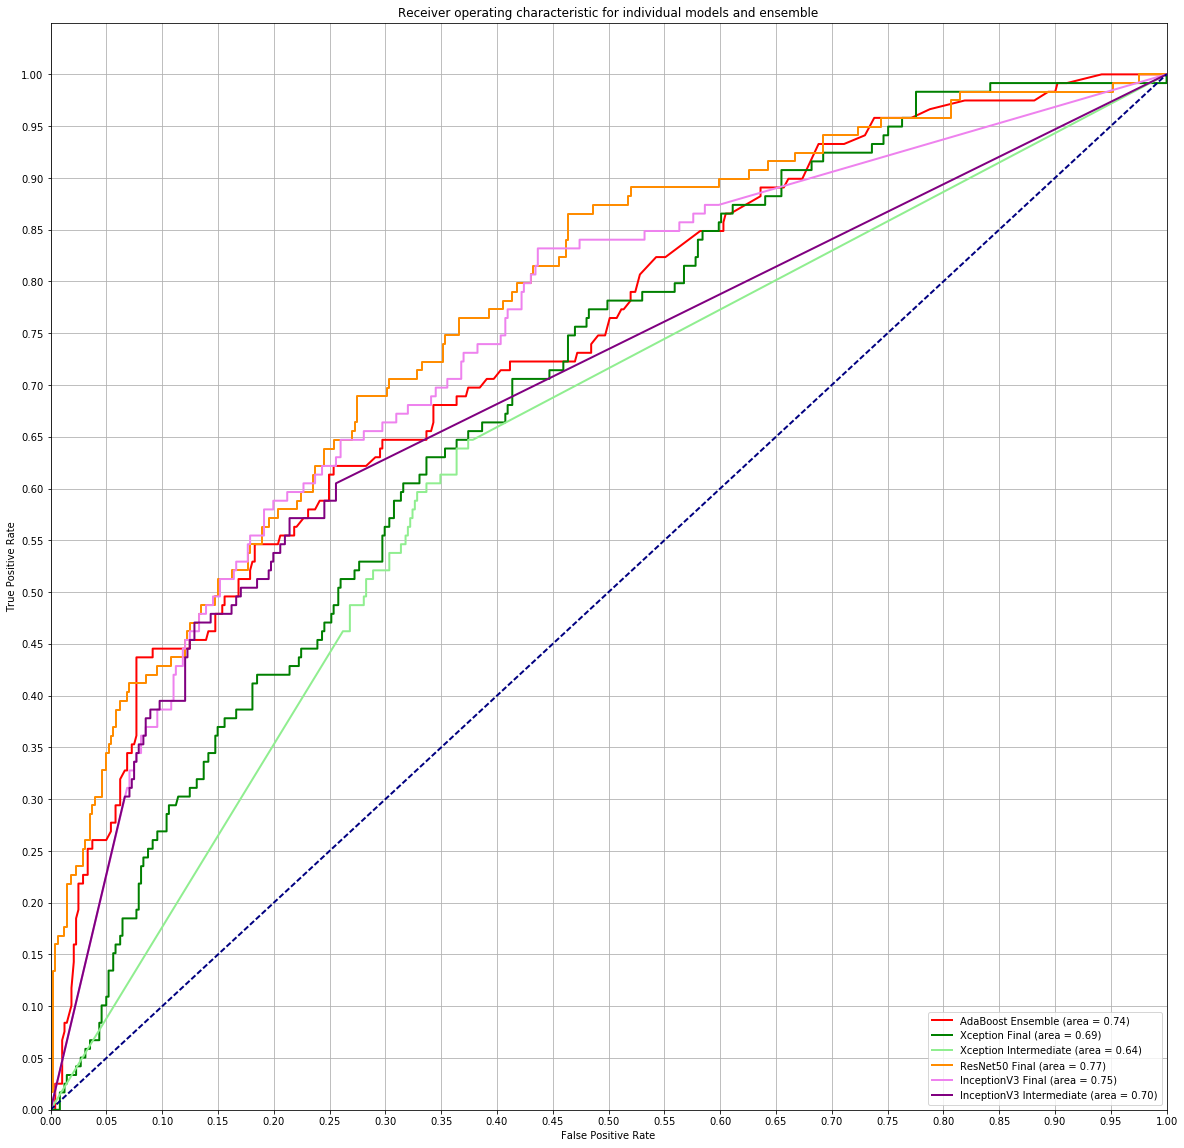

In [694]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
lw = 2
plt.plot(fpr_ada, tpr_ada, color='red',
         lw=lw, label='AdaBoost Ensemble (area = %0.2f)' % roc_auc_ada)
plt.plot(fpr_xception_final, tpr_xception_final, color='green',
         lw=lw, label='Xception Final (area = %0.2f)' % roc_auc_xception_final)
plt.plot(fpr_xception_intermediate, tpr_xception_intermediate, color='lightgreen',
         lw=lw, label='Xception Intermediate (area = %0.2f)' % roc_auc_xception_intermediate)
plt.plot(fpr_resnet_final, tpr_resnet_final, color='darkorange',
         lw=lw, label='ResNet50 Final (area = %0.2f)' % roc_auc_resnet_final)
plt.plot(fpr_inception_final, tpr_inception_final, color='violet',
         lw=lw, label='InceptionV3 Final (area = %0.2f)' % roc_auc_inception_final)
plt.plot(fpr_inception_intermediate, tpr_inception_intermediate, color='purple',
         lw=lw, label='InceptionV3 Intermediate (area = %0.2f)' % roc_auc_inception_intermediate)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xticks(np.arange(0.0, 1.05, 0.05))
plt.yticks(np.arange(0.0, 1.05, 0.05))
plt.grid(True)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for individual models and ensemble')
plt.legend(loc="lower right")
plt.show()